### Tomek Links

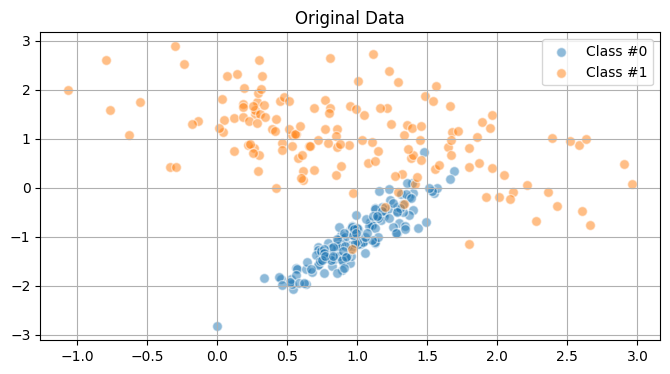

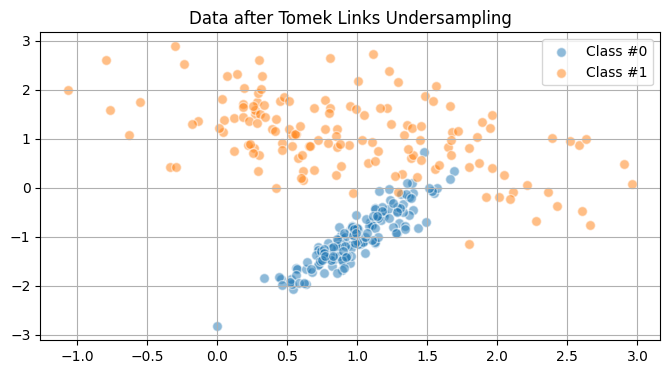

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.under_sampling import TomekLinks

# Generate a synthetic dataset
# Corrected to ensure the sum of informative and redundant features is less than the total features
#X, y = make_classification(n_classes=2, class_sep=2,
                           #weights=[0.1, 0.9], n_informative=2, n_redundant=0, flip_y=0,
                           #n_features=2, n_clusters_per_class=1, n_samples=200, random_state=1)

# Generate a synthetic dataset with overlap
X, y = make_classification(n_classes=2, class_sep=1, # class_sep controls the separability of the classes
                           weights=[0.5, 0.5], n_informative=2, n_redundant=0, flip_y=0,
                           n_features=2, n_clusters_per_class=1, n_samples=300, random_state=42)

# Plotting function to visualize the data
def plot_data(X, y, title):
    plt.figure(figsize=(8, 4))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class #0", alpha=0.5, edgecolors='w', s=50)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class #1", alpha=0.5, edgecolors='w', s=50)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Original data plot
plot_data(X, y, "Original Data")

# Applying Tomek Links
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X, y)

# Resampled data plot
plot_data(X_res, y_res, "Data after Tomek Links Undersampling")


In [ ]:
X.shape

(300, 2)

In [ ]:
X_res.shape

(296, 2)

### Edited Nearest Neighbor

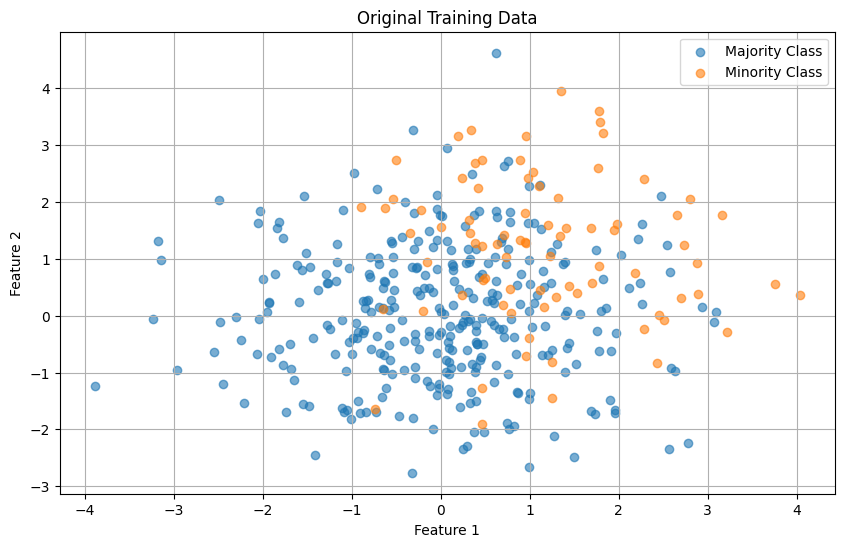

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Generate a synthetic imbalanced binary dataset with make_blobs
# Adjust the centers and standard deviation to reduce the gap and create some overlap
X, y = make_blobs(n_samples=[400, 100], centers=[[0, 0], [1, 1]], cluster_std=1.2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot original data
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Majority Class', alpha=0.6)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Minority Class', alpha=0.6)
plt.title('Original Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


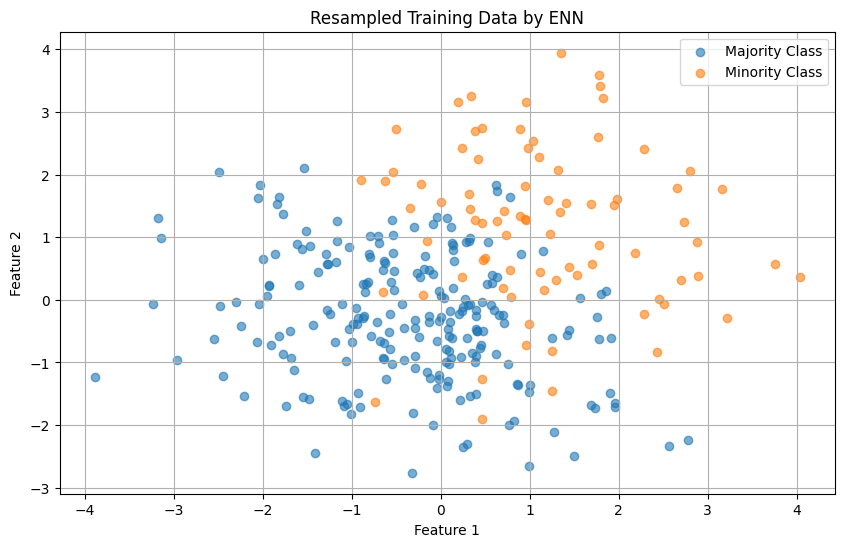

In [ ]:
# Apply Edited Nearest Neighbours
enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X_train, y_train)

# Plot resampled data
plt.figure(figsize=(10, 6))
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label='Majority Class', alpha=0.6)
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label='Minority Class', alpha=0.6)
plt.title('Resampled Training Data by ENN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X_train.shape

(400, 2)

In [ ]:
X_resampled.shape

(300, 2)

In [ ]:
import pandas as pd

pd.Series(y_train).value_counts()

0    319
1     81
Name: count, dtype: int64

In [ ]:
pd.Series(y_resampled).value_counts()

0    219
1     81
Name: count, dtype: int64

In [ ]:
# Train a classifier on the resampled data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Test the classifier
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        81
           1       0.58      0.37      0.45        19

    accuracy                           0.83       100
   macro avg       0.72      0.65      0.68       100
weighted avg       0.81      0.83      0.81       100



In [ ]:
# Train a classifier on the resampled data
knn = KNeighborsClassifier()
knn.fit(X_resampled, y_resampled)

# Test the classifier
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        81
           1       0.48      0.68      0.57        19

    accuracy                           0.80       100
   macro avg       0.70      0.76      0.72       100
weighted avg       0.83      0.80      0.81       100



### Neighborhood Cleaning Rule

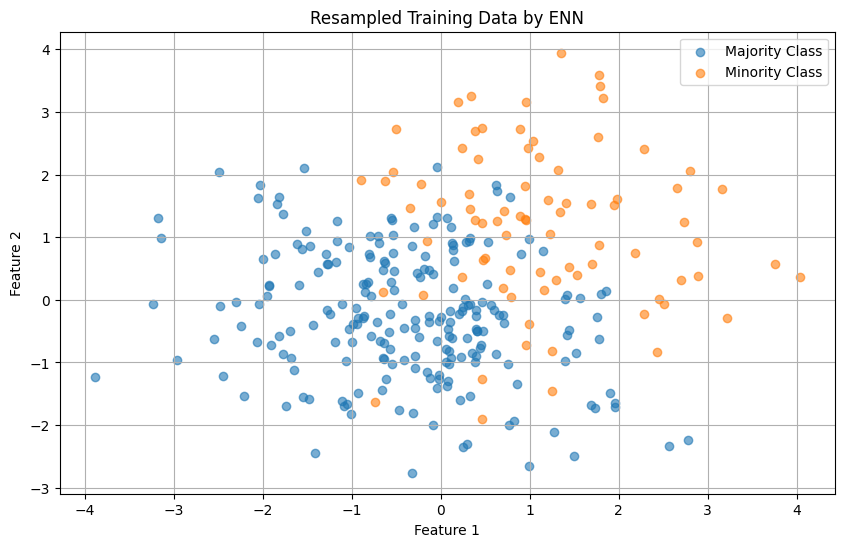

In [ ]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

ncr = NeighbourhoodCleaningRule()
X_resampled, y_resampled = ncr.fit_resample(X_train, y_train)

# Plot resampled data
plt.figure(figsize=(10, 6))
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label='Majority Class', alpha=0.6)
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label='Minority Class', alpha=0.6)
plt.title('Resampled Training Data by ENN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X_resampled.shape

(298, 2)

In [ ]:
pd.Series(y_resampled).value_counts()

0    217
1     81
Name: count, dtype: int64

In [ ]:
# Train a classifier on the resampled data
knn = KNeighborsClassifier()
knn.fit(X_resampled, y_resampled)

# Test the classifier
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        81
           1       0.48      0.68      0.57        19

    accuracy                           0.80       100
   macro avg       0.70      0.76      0.72       100
weighted avg       0.83      0.80      0.81       100



### Cluster Centroids

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


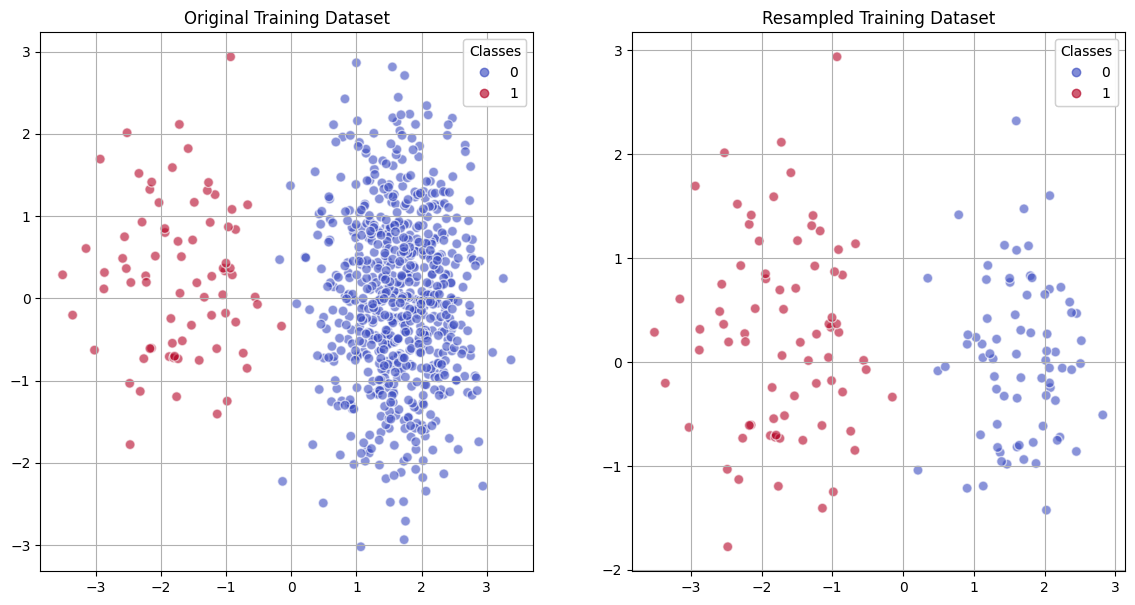

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Generate a synthetic imbalanced dataset with 2 informative, 1 redundant, and 0 repeated features
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.9, 0.1], n_informative=2, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Plotting function to plot the classes
def plot_classes(X, y, subplot, title):
    ax = plt.subplot(subplot)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.6, edgecolors='w', s=50)
    plt.title(title)
    plt.grid(True)
    legends = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.add_artist(legends)

# Create a figure with 2 subplots (side by side)
plt.figure(figsize=(14, 7))

# Plot original distribution
plot_classes(X_train, y_train, 121, "Original Training Dataset")  # 121 means 1 row, 2 columns, 1st subplot

# Apply Cluster Centroids undersampling
cc = ClusterCentroids(random_state=42)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

# Plot resampled distribution
plot_classes(X_resampled, y_resampled, 122, "Resampled Training Dataset")  # 122 means 1 row, 2 columns, 2nd subplot

plt.show()


In [ ]:
X_train.shape, X_resampled.shape

((750, 20), (150, 20))

In [ ]:
import pandas as pd
pd.Series(y_train).value_counts()

0    675
1     75
Name: count, dtype: int64

In [ ]:
import pandas as pd
pd.Series(y_resampled).value_counts()

0    75
1    75
Name: count, dtype: int64